## Student: Tejas Singhal  
## UIN: 836000009

# CSCE 676: Project Checkpoint 1
## Dataset Comparison, Selection, and EDA

---

### (A) Identification of Candidate Datasets

For this project, I looked for three datasets that would fit the course topics (like clustering or graph mining) but also let me try some newer techniques that we haven't covered in class yet.

#### 1. Online Retail II Dataset
*   **Dataset Name and Source:** Online Retail II from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii).
*   **Course Topic Alignment:** This fits perfectly with **Frequent Itemsets and Association Rule mining** because it’s a list of actual customer transactions.
*   **Potential Beyond-Course Techniques:** I could use **Sequential Pattern Mining** (like the PrefixSpan algorithm) to see the order in which people buy things, not just what they buy together.
*   **Dataset Size and Structure:** It has about 1 million rows and 8 columns. It’s a standard table where each row is an item in a transaction.
*   **Data Types:** It has invoice numbers, stock codes, descriptions, quantities, dates, prices, and customer IDs.
*   **Target Variable:** There isn't really a target since it's unsupervised, but I could look at total spend per customer.
*   **Licensing:** CC BY 4.0 (free for research).

#### 2. Amazon Product Reviews (Cell Phones & Accessories)
*   **Dataset Name and Source:** Amazon Product Data (2018) from the [McAuley Lab Page](https://nijianmo.github.io/amazon/index.html).
*   **Course Topic Alignment:** This works for **Text Mining and Embeddings** since it's full of user reviews and ratings.
*   **Potential Beyond-Course Techniques:** I'm interested in **Topic Modeling (using LDA)** to see what specific features of the phones people are talking about most.
*   **Dataset Size and Structure:** This dataset covers millions of reviews; for this project, I'd focus on the 'Cell Phones and Accessories' category.
*   **Data Types:** Reviewer IDs, product IDs (ASIN), review text, star ratings, and timestamps.
*   **Target Variable:** The `overall` star rating (1-5) or I could try to predict if a review is helpful.
*   **Licensing:** Open for research use.

#### 3. Twitch Gamers Social Network
*   **Dataset Name and Source:** Twitch Social Networks from [Stanford SNAP](https://snap.stanford.edu/data/twitch-social-networks.html).
*   **Course Topic Alignment:** This is a classic **Graph Mining** dataset. I could run **PageRank** to find influential streamers or use **Community Detection** to find groups of friends.
*   **Potential Beyond-Course Techniques:** I could try **Node Embeddings or Graph Neural Networks (GNNs)** to predict things about the users based on who they follow.
*   **Dataset Size and Structure:** About 168k users (nodes) and 6.7 million mutual follow links (edges).
*   **Data Types:** Node IDs and an edge list representing the relationships. It also has some basic features like "is the streamer an affiliate."
*   **Target Variable:** Binary variables like whether the streamer uses mature language.
*   **Licensing:** Public domain for research.

---

### (B) Comparative Analysis of Datasets

To help decide which dataset to move forward with, I compared the three candidates based on their technical properties, how they fit the course, and potential challenges like bias or ethical issues.

| Dimension | Online Retail II | Amazon Product Reviews | Twitch Gamers Social Network |
| :--- | :--- | :--- | :--- |
| **Supported Tasks** | **Course:** Frequent Itemsets, Association Rules. <br>**External:** Sequential Pattern Mining. | **Course:** Text Mining, Embeddings. <br>**External:** Topic Modeling (LDA). | **Course:** PageRank, Community Detection. <br>**External:** Graph Neural Networks (GNNs). |
| **Data Quality Issues** | Some missing Customer IDs; negative "Quantity" values (representing returns/cancellations). | Noisy text (slang, emojis, sarcasm); potential duplicate reviews or bots. | High graph sparsity; many "isolated" users who don't follow many others. |
| **Algorithmic Feasibility** | Very high. Fits easily in RAM. Apriori and PrefixSpan run efficiently on this size. | Challenging. Requires significant preprocessing and high memory for LDA on large subsets. | Moderate. Requires specialized libraries like NetworkX. Might be slow without a GPU for GNNs. |
| **Bias Considerations** | **Seasonality Bias:** Data is from 2009-2011. **Demographic Bias:** Most customers are UK-based wholesalers. | **Selection Bias:** Usually only people with very strong opinions (positive or negative) leave reviews. | **Sampling Bias:** Twitch users are skewed toward younger, gaming-oriented demographics. |
| **Ethical Considerations** | Low risk. Data is anonymized. Main concern is the business power dynamic between wholesalers. | Moderate. Public reviews, but scraping raises privacy concerns. Sentiment bias can affect product sales. | Moderate. Social mapping can reveal private communities. Dynamics involve streamers vs. followers. |

---

### (C) Dataset Selection

**Selected Dataset:** Online Retail II Dataset

**Reasons for Selection:**
1. This dataset is a perfect fit for Frequent Itemset Mining and Association Rules, which are core topics in CSCE 676. The transactional nature of the data allows for clear, interpretable results.
2. The presence of timestamps (InvoiceDate) makes it highly suitable for Sequential Pattern Mining, a technique that goes beyond the basic "market basket analysis" covered in class by considering the temporal order of purchases.
3. The data is tabular and well-structured, making it easy to clean and process in a standard Python environment. It is large enough to be interesting but small enough to run complex algorithms without needing a high-performance cluster or GPU.

**Trade-offs:**
*   **Limited Variety in Data Types:** Unlike the Amazon dataset, this does not have a rich text component for natural language processing.
*   **Geographic Bias:** The data is heavily skewed towards UK customers, so any insights found might not generalize to other global markets.

---

### (D) Exploratory Data Analysis (Selected Dataset Only)

#### 1. Data Loading and Initial Inspection
First, I'll load the dataset. Since the UCI data comes in an Excel format with two sheets (Year 2009-2010 and Year 2010-2011), I will combine them for a comprehensive analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df_raw_1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_raw_2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

# Combine the two years into one dataframe
df = pd.concat([df_raw_1, df_raw_2], ignore_index=True)

# Basic inspection
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1067371, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


**Decision:** I am combining both sheets into a single dataframe.  
**Why:** This allows me to analyze customer behavior over the full two-year period, which is essential for identifying meaningful sequential patterns later on.

#### 2. Data Cleaning
The initial inspection usually reveals some issues, such as missing Customer IDs or negative quantities (which represent cancellations).

In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# 1. Drop rows with missing Customer ID
df.dropna(subset=['Customer ID'], inplace=True)

# 2. Separate cancellations (Invoices starting with 'C' or negative Quantity)
df_clean = df[~(df['Invoice'].astype(str).str.startswith('C') | (df['Quantity'] < 0))].copy()

print(f"Cleaned Dataset Shape: {df_clean.shape}")

Missing values per column:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64
Cleaned Dataset Shape: (805620, 8)


**Decision:** I dropped rows where the `Customer ID` was missing.  
**Why:** Since my proposed project involves tracking sequences of purchases for specific users, data without a Customer ID cannot be used to link transactions together.

**Decision:** I removed transactions that were cancellations (marked with a 'C' in the Invoice number).  
**Why:** For frequent itemset mining, we are interested in what people actually purchased and kept. Including cancellations would skew the co-occurrence patterns.

#### 3. Visualizing Data Patterns

In this step, I will create visualizations to uncover the underlying patterns in the transactional data.

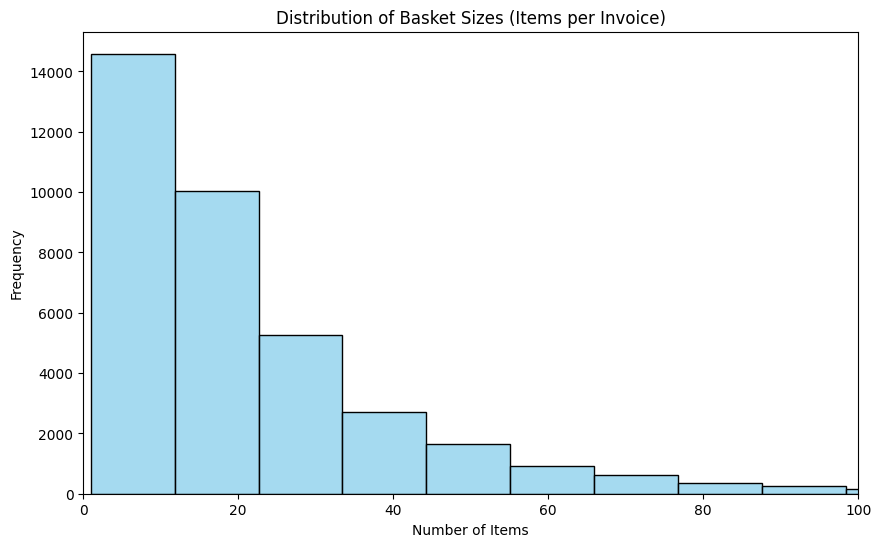

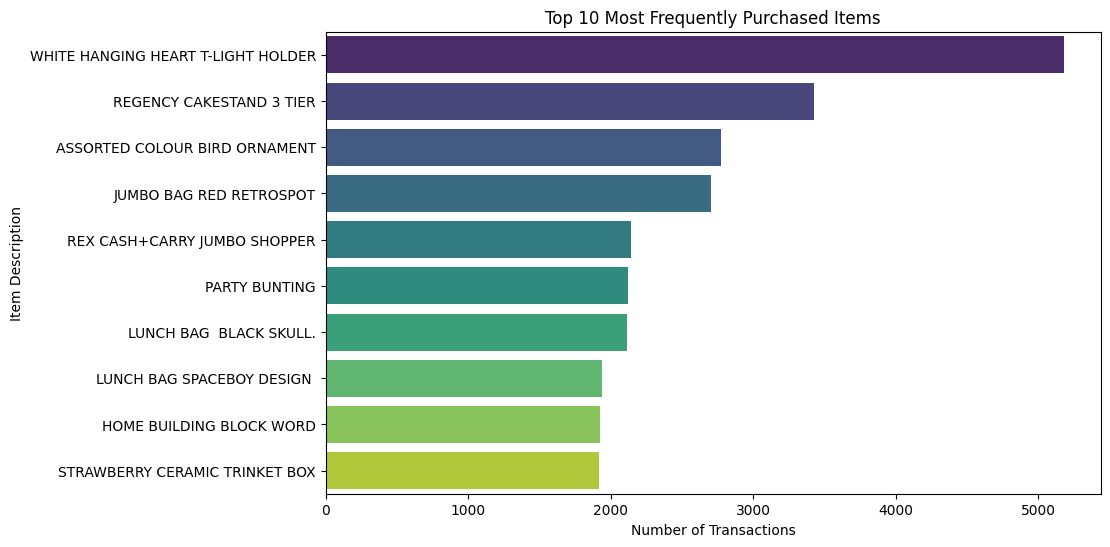

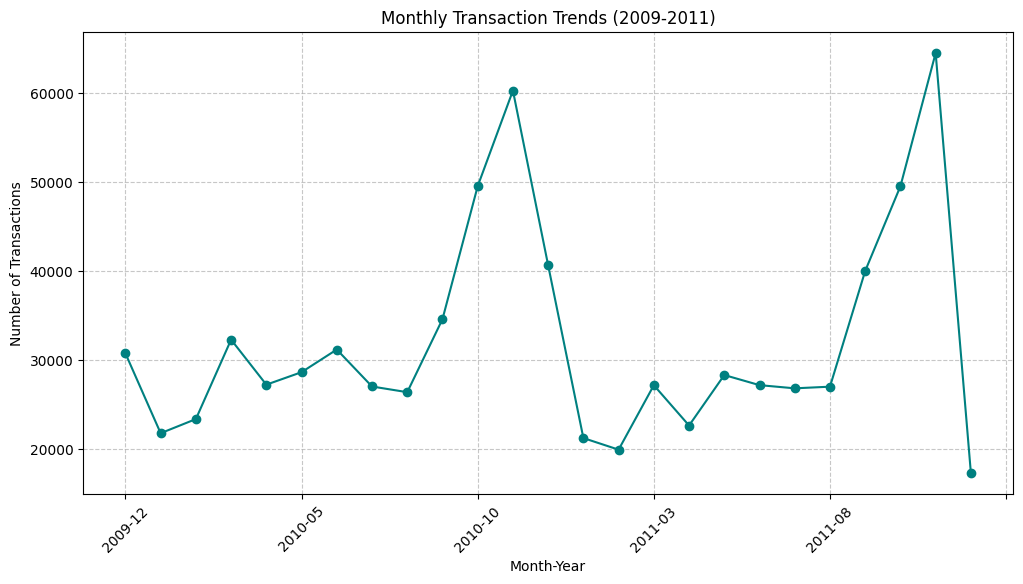

In [5]:
# 1. Distribution of Basket Sizes
basket_sizes = df_clean.groupby('Invoice')['StockCode'].count()

plt.figure(figsize=(10, 6))
sns.histplot(basket_sizes, bins=50, kde=False, color='skyblue')
plt.title('Distribution of Basket Sizes (Items per Invoice)')
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

# 2. Top 10 Most Frequent Items
top_items = df_clean['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, hue=top_items.index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Number of Transactions')
plt.ylabel('Item Description')
plt.show()

# 3. Monthly Transaction Trends
df_clean['MonthYear'] = df_clean['InvoiceDate'].dt.to_period('M').astype(str)
monthly_counts = df_clean.groupby('MonthYear').size()

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Transaction Trends (2009-2011)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Decision:** I chose a histogram for basket sizes to see the distribution of items per transaction.  
**Why:** This helps determine a reasonable 'support' threshold for future association rule mining, as very large or very small baskets can impact the quality of rules.

**Decision:** I used a line plot for monthly trends.  
**Why:** This helps confirm the seasonality bias noted in the comparative analysis, showing significant peaks during the holiday periods (November-December).

---

### (E) Initial Insights and Direction

Based on the EDA above, I have identified several key insights that will shape the direction of the project.

**Key Observation:** Most invoices contain fewer than 20 items, but there is a long tail of much larger baskets. Additionally, certain items like "WHITE HANGING HEART T-LIGHT HOLDER" appear significantly more often than others.

**Initial Hypothesis:** High support thresholds in association rule mining might only capture extremely common items (like the T-light holder), potentially missing more interesting, niche associations found in larger baskets.

**Potential Research Questions (RQs):**
1. How do association rules differ when focusing on holiday peak months (Nov-Dec) versus the rest of the year?
2. Can sequential pattern mining (external technique) predict a customer's next purchase more accurately than static association rules?
3. Does the sparsity of the item co-occurrence matrix necessitate a dimensionality reduction approach before clustering customers?

---
## Collaboration Declaration

1. **Collaborators:** None.
2. **Web Sources:** UCI Machine Learning Repository, McAuley Lab (Amazon 2018), SNAP (Stanford University).
3. **Citations:** 
    * Chen, D. (2012). Online Retail II [Dataset]. UCI Machine Learning Repository.
    * Ni, J., Li, J., & McAuley, J. (2019). Justifying recommendations using distantly-labeled reviews and fine-grained aspects. EMNLP.
    * Rozemberczki, B., & Sarkar, R. (2021). Twitch Gamers: a Dataset for Evaluating Proximity Preserving and Structural Role-based Node Embeddings.